In [96]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
file_path = '/content/drive/MyDrive/dataset.csv'
spotify_dataset = pd.read_csv(file_path)

print("Music Dataset Preview:")
print(spotify_dataset.head())
print(spotify_dataset.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Music Dataset Preview:
   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       2306

In [97]:
from sklearn.preprocessing import MinMaxScaler

spotify_dataset = spotify_dataset.drop_duplicates()
spotify_dataset = spotify_dataset.dropna()

selected_features = ["energy", "danceability", "valence", "tempo", "popularity", "acousticness", "loudness"]
features = spotify_dataset[selected_features]

scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)

normalized_spotify_dataset = pd.DataFrame(normalized_features, columns=selected_features)
normalized_spotify_dataset["track_id"] = spotify_dataset["track_id"]
print("Normalized Spotify Dataset:")
print(normalized_spotify_dataset.head())
print(normalized_spotify_dataset.shape)

# optional to save on a dataset,
normalized_spotify_dataset.to_csv("normalized_spotify_dataset.csv", index=False)
print("\nNormalized Spotify Dataset saved as 'normalized_spotify_dataset.csv'.")

Normalized Spotify Dataset:
   energy  danceability   valence     tempo  popularity  acousticness  \
0  0.4610      0.686294  0.718593  0.361245        0.73      0.032329   
1  0.1660      0.426396  0.268342  0.318397        0.55      0.927711   
2  0.3590      0.444670  0.120603  0.313643        0.57      0.210843   
3  0.0596      0.270051  0.143719  0.746758        0.71      0.908635   
4  0.4430      0.627411  0.167839  0.492863        0.82      0.470884   

   loudness                track_id  
0  0.791392  5SuOikwiRyPMVoIQDJUgSV  
1  0.597377  4qPNDBW1i3p13qLCt0Ki3A  
2  0.736123  1iJBSr7s7jYXzM8EGcbK5b  
3  0.573701  6lfxq3CG4xtTiEg7opyCyx  
4  0.737103  5vjLSffimiIP26QG5WcN2K  
(113999, 8)

Normalized Spotify Dataset saved as 'normalized_spotify_dataset.csv'.


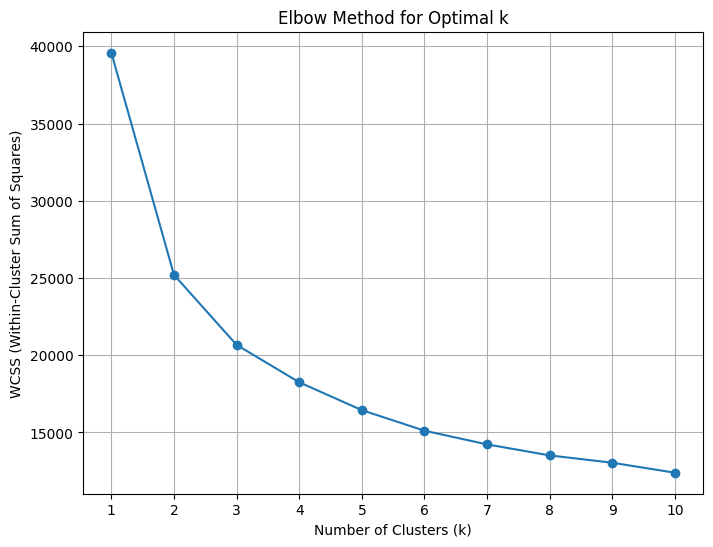

In [98]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

features = normalized_spotify_dataset[["energy", "danceability", "valence", "tempo", "popularity", "acousticness", "loudness"]]

wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.xticks(k_values)
plt.grid()
plt.show()


In [99]:

optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
normalized_spotify_dataset["cluster"] = kmeans.fit_predict(features)


print("Clustered Spotify Dataset:")
print(normalized_spotify_dataset.head())
print(normalized_spotify_dataset.shape)

# optional
normalized_spotify_dataset.to_csv("clustered_spotify_dataset.csv", index=False)
print("\nClustered Spotify Dataset saved as 'clustered_spotify_dataset.csv'.")


# Get centroids
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=selected_features)
centroids_df["cluster"] = range(optimal_k)
print("\nCentroids:")
print(centroids_df)

Clustered Spotify Dataset:
   energy  danceability   valence     tempo  popularity  acousticness  \
0  0.4610      0.686294  0.718593  0.361245        0.73      0.032329   
1  0.1660      0.426396  0.268342  0.318397        0.55      0.927711   
2  0.3590      0.444670  0.120603  0.313643        0.57      0.210843   
3  0.0596      0.270051  0.143719  0.746758        0.71      0.908635   
4  0.4430      0.627411  0.167839  0.492863        0.82      0.470884   

   loudness                track_id  cluster  
0  0.791392  5SuOikwiRyPMVoIQDJUgSV        3  
1  0.597377  4qPNDBW1i3p13qLCt0Ki3A        1  
2  0.736123  1iJBSr7s7jYXzM8EGcbK5b        0  
3  0.573701  6lfxq3CG4xtTiEg7opyCyx        1  
4  0.737103  5vjLSffimiIP26QG5WcN2K        3  
(113999, 9)

Clustered Spotify Dataset saved as 'clustered_spotify_dataset.csv'.

Centroids:
     energy  danceability   valence     tempo  popularity  acousticness  \
0  0.778047      0.484289  0.241739  0.533994    0.323220      0.069530   
1  0.2562

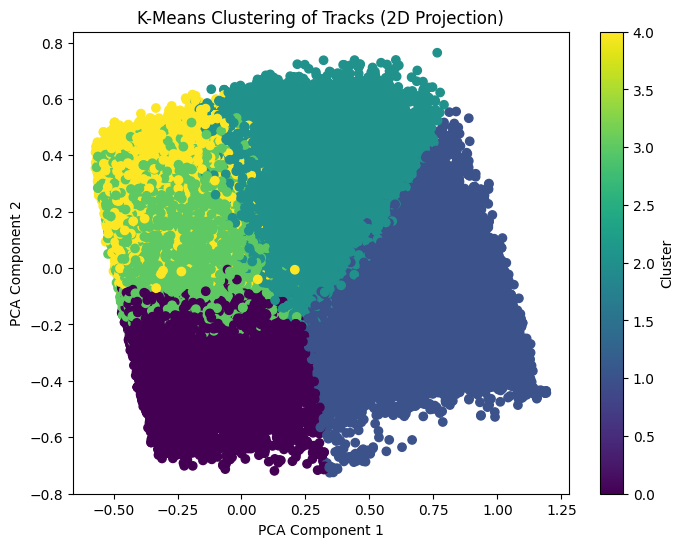

In [100]:
# optional
from sklearn.decomposition import PCA

# Reduce features to 2 dimension
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(normalized_features)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=normalized_spotify_dataset["cluster"], cmap="viridis")
plt.title("K-Means Clustering of Tracks (2D Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()


# what each cluster of music is, what type of music are they???



In [101]:
import requests
import pandas as pd
API_KEY = "371ed997ca54c463d729680bd3742030"

def fetch_weather_data(city):
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_KEY}&units=metric"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        return {
            "city": city,
            "weather_code": data["weather"][0]["id"],  # Weather condition
            "temperature": data["main"]["temp"],
            "humidity": data["main"]["humidity"],
            "pressure": data["main"]["pressure"],
            "cloudiness": data["clouds"]["all"],
            "wind_speed": data["wind"]["speed"],
            "precipitation": data.get("rain", {}).get("1h", 0) + data.get("snow", {}).get("1h", 0),  # Rain/Snow fallback
        }
    else:
        print(f"Failed to fetch weather data for {city}. Status Code: {response.status_code}")
        return None



city = "Dhaka"
weather_data = fetch_weather_data(city)
if weather_data:
    print(weather_data)


{'city': 'Dhaka', 'weather_code': 721, 'temperature': 24.99, 'humidity': 44, 'pressure': 1016, 'cloudiness': 2, 'wind_speed': 2.57, 'precipitation': 0}


In [102]:
# weather categories based on weather code:

def simplify_weather_category(weather_code):
    if 200 <= weather_code < 300:
        return "stormy"
    elif 300 <= weather_code < 600:
        return "rainy"
    elif 600 <= weather_code < 700:
        return "snowy"
    elif weather_code == 800:
        return "clear"
    elif 801 <= weather_code <= 804:
        return "cloudy"
    elif 700 <= weather_code < 800:
        return "atmospheric"  # mist, haze, smoke
    else:
        return "unknown"

# Map the current weather code to a category
if weather_data:
    weather_data["weather_category"] = simplify_weather_category(weather_data["weather_code"])
    print(weather_data["weather_category"])

atmospheric


In [103]:
# weather categories and music cluster:

weather_to_music_mapping = {
    "clear": [0, 1],
    "rainy": [2, 3],
    "snowy": [4],
    "cloudy": [3, 4],
    "stormy": [2],
    "atmospheric": [1, 2]
}




if weather_data:
    weather_category = weather_data["weather_category"]
    relevant_clusters = weather_to_music_mapping.get(weather_category, [])
    print(f"\nWeather Category: {weather_category}")
    print(f"Relevant Music Clusters: {relevant_clusters}")



Weather Category: atmospheric
Relevant Music Clusters: [1, 2]


In [104]:
# initial recomandation:

def filter_tracks_by_cluster(cluster_ids, music_dataset):
    return music_dataset[music_dataset["cluster"].isin(cluster_ids)]


def generate_recommendations(weather_data, music_dataset, n_recommendations=5):
    weather_category = weather_data.get("weather_category")
    relevant_clusters = weather_to_music_mapping.get(weather_category, [])

    if not relevant_clusters:
        print(f"No relevant clusters found for weather category: {weather_category}")
        return pd.DataFrame()

    filtered_tracks = filter_tracks_by_cluster(relevant_clusters, music_dataset)
    recommended_tracks = filtered_tracks.sort_values(by="popularity", ascending=False).head(n_recommendations)

    return recommended_tracks




if weather_data:
    clustered_music_file = "clustered_spotify_dataset.csv"
    clustered_music_dataset = pd.read_csv(clustered_music_file)
    recommendations = generate_recommendations(weather_data, clustered_music_dataset, n_recommendations=5)
    print("\n Initital Recommended Tracks Based on Current Weather:")
    print(recommendations[["track_id", "energy", "danceability", "valence", "popularity", "cluster"]])



 Initital Recommended Tracks Based on Current Weather:
                     track_id  energy  danceability   valence  popularity  \
81101  1cKHdTo9u0ZymJdPGSh6nq   0.317      0.446701  0.269347        0.94   
89408  1gJA27xiMdENwoAVN7kMlo   0.516      0.883249  0.532663        0.93   
15013  3JvKfv6T31zO0ini8iNItO   0.537      0.451777  0.131658        0.93   
88407  1IHWl5LamUGEuP4ozKQSXZ   0.516      0.883249  0.532663        0.93   
81860  5oYRr51VatOtkFeEOursuZ   0.537      0.451777  0.131658        0.93   

       cluster  
81101        1  
89408        2  
15013        1  
88407        2  
81860        1  


In [109]:
# feedback storage:
def collect_feedback(recommended_tracks, weather_data, feedback_file="feedback_dataset.csv"):
    feedback_data = []

    print("\nPlease provide feedback on the following tracks:")
    for _, row in recommended_tracks.iterrows():
        print(f"Track ID: {row['track_id']}, Popularity: {row['popularity']}")
        print(f"Do you like this track? (1 for Yes, 0 for No): ", end="")

        feedback = int(input())
        feedback_entry = {
            "track_id": row["track_id"],
            "popularity": row["popularity"],
            "energy": row["energy"],
            "danceability": row["danceability"],
            "valence": row["valence"],
            "cluster": row["cluster"],
            "temperature": weather_data["temperature"],
            "humidity": weather_data["humidity"],
            "pressure": weather_data["pressure"],
            "cloudiness": weather_data["cloudiness"],
            "wind_speed": weather_data["wind_speed"],
            "precipitation": weather_data["precipitation"],
            "weather_code": weather_data["weather_code"],
            "liked": feedback,  # User feedback
        }
        feedback_data.append(feedback_entry)

    feedback_df = pd.DataFrame(feedback_data)

    # Save feedback to CSV file:
    try:
        existing_feedback = pd.read_csv(feedback_file)
        updated_feedback = pd.concat([existing_feedback, feedback_df], ignore_index=True)
    except FileNotFoundError:
        updated_feedback = feedback_df

    updated_feedback.to_csv(feedback_file, index=False)
    print(f"\nFeedback saved to {feedback_file}.")


In [110]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
import pickle
import os
import pandas as pd

# if the feedback.csv exists:
feedback_file = "feedback_dataset.csv"
if not os.path.exists(feedback_file):
    feedback_data = pd.DataFrame(columns=[
        "track_id", "popularity", "energy", "danceability", "valence", "cluster",
        "temperature", "humidity", "pressure", "cloudiness", "wind_speed",
        "precipitation", "weather_code", "liked"
    ])
    feedback_data.to_csv(feedback_file, index=False)
    print(f"Feedback file '{feedback_file}' created.")
    print("Please collect feedback before training models.")
else:
    feedback_data = pd.read_csv(feedback_file)
    print(f"Feedback file '{feedback_file}' loaded successfully.")


print("\nFeedback Dataset Preview:")
print(feedback_data.head())

# if feedback data empty:
if feedback_data.empty:
    print("Feedback dataset is empty. Please collect feedback before training models.")
else:

    weather_features = feedback_data[["temperature", "humidity", "pressure", "cloudiness", "wind_speed", "precipitation"]]
    weather_target = feedback_data["liked"]

    X_train_weather, X_test_weather, y_train_weather, y_test_weather = train_test_split(weather_features, weather_target, test_size=0.2, random_state=42)
    linear_model = LinearRegression()
    linear_model.fit(X_train_weather, y_train_weather)
    weather_predictions = linear_model.predict(X_test_weather)
    print("\nLinear Regression Model - MSE:", mean_squared_error(y_test_weather, weather_predictions))

    with open("linear_model.pkl", "wb") as f:
        pickle.dump(linear_model, f)
    print("\nLinear Regression Model Saved as 'linear_model.pkl'.")


    song_features = feedback_data[["energy", "danceability", "valence", "tempo", "popularity", "acousticness", "loudness"]]
    song_target = feedback_data["liked"]
    X_train_song, X_test_song, y_train_song, y_test_song = train_test_split(song_features, song_target, test_size=0.2, random_state=42)
    logistic_model = LogisticRegression()
    logistic_model.fit(X_train_song, y_train_song)
    song_predictions = logistic_model.predict(X_test_song)
    print("\nLogistic Regression Model - Accuracy:", accuracy_score(y_test_song, song_predictions))

    with open("logistic_model.pkl", "wb") as f:
        pickle.dump(logistic_model, f)
    print("\nLogistic Regression Model Saved as 'logistic_model.pkl'.")


Feedback file 'feedback_dataset.csv' loaded successfully.

Feedback Dataset Preview:
  track_id  popularity    energy  danceability   valence       tempo  \
0  track_1          68  0.573486      0.917405  0.635541  140.375701   
1  track_2          79  0.494113      0.630724  0.626753  164.938296   
2  track_3          97  0.290368      0.418754  0.305219  185.282134   
3  track_4           9  0.557856      0.153803  0.669339  159.111559   
4  track_5          34  0.746364      0.478914  0.294593  145.462622   

   acousticness   loudness  cluster  temperature   humidity     pressure  \
0      0.174418 -14.134771        0    34.815837  57.350254   966.972057   
1      0.070864 -20.353697        1    22.800100  51.916070  1003.825004   
2      0.368159 -13.083630        4     4.481102  49.920974   962.982560   
3      0.092437  -2.366037        1     3.767995  34.352722   976.933315   
4      0.774108  -4.630049        3    12.390421  24.755353  1020.708852   

   cloudiness  wind_speed

In [111]:
import pickle
import pandas as pd

with open("linear_model.pkl", "rb") as f:
    linear_model = pickle.load(f)
with open("logistic_model.pkl", "rb") as f:
    logistic_model = pickle.load(f)

def hybrid_recommend_songs(weather_data, music_dataset, linear_model, logistic_model, top_n=5, alpha=0.7, beta=0.3):

    weather_features = pd.DataFrame([[
        weather_data["temperature"],
        weather_data["humidity"],
        weather_data["pressure"],
        weather_data["cloudiness"],
        weather_data["wind_speed"],
        weather_data["precipitation"]
    ]], columns=["temperature", "humidity", "pressure", "cloudiness", "wind_speed", "precipitation"])


    weather_scores = linear_model.predict(weather_features)
    music_dataset["weather_score"] = music_dataset["cluster"].apply(lambda c: weather_scores[c] if c < len(weather_scores) else 0)

    song_features = music_dataset[["energy", "danceability", "valence", "tempo", "popularity", "acousticness", "loudness"]]
    user_preference_scores = logistic_model.predict_proba(song_features)[:, 1]
    music_dataset["preference_score"] = user_preference_scores

    music_dataset["hybrid_score"] = alpha * music_dataset["weather_score"] + beta * music_dataset["preference_score"]
    recommendations = music_dataset.sort_values(by="hybrid_score", ascending=False).head(top_n)
    return recommendations




if weather_data:
    clustered_music_file = "clustered_spotify_dataset.csv"
    clustered_music_dataset = pd.read_csv(clustered_music_file)
    recommendations = hybrid_recommend_songs(weather_data, clustered_music_dataset, linear_model, logistic_model, top_n=5)
    print(recommendations[["track_id", "hybrid_score", "weather_score", "preference_score", "cluster"]])

                      track_id  hybrid_score  weather_score  preference_score  \
101742  6YpcXupRf0w7CXmnTYsJkj      0.704409       0.653215          0.823860   
101416  28Wnwp5FDBU0vzlU2BbKR0      0.704406       0.653215          0.823850   
101984  18uUw1Stb2demvWXH7ZwMN      0.704245       0.653215          0.823316   
22667   0rJy63poJKgiNN08PD16vp      0.703768       0.653215          0.821723   
6390    70RLwSIBClxedybDYa2XWy      0.703555       0.653215          0.821014   

        cluster  
101742        0  
101416        0  
101984        0  
22667         0  
6390          0  


In [113]:
# Function to populate the feedback dataset with synthetic data
def populate_feedback_dataset(file_path, num_entries=100):
    """
    Populate the feedback dataset with synthetic data.

    Args:
        file_path (str): Path to the feedback dataset file.
        num_entries (int): Number of synthetic feedback entries to generate.
    """
    import random
    # Define ranges for synthetic data
    track_ids = [f"track_{i}" for i in range(1, num_entries + 1)]
    popularity = [random.randint(0, 100) for _ in range(num_entries)]
    energy = [random.uniform(0, 1) for _ in range(num_entries)]
    danceability = [random.uniform(0, 1) for _ in range(num_entries)]
    valence = [random.uniform(0, 1) for _ in range(num_entries)]
    tempo = [random.uniform(80, 200) for _ in range(num_entries)]  # Example range: 80-200 BPM
    acousticness = [random.uniform(0, 1) for _ in range(num_entries)]
    loudness = [random.uniform(-60, 0) for _ in range(num_entries)]  # Example range: -60 dB to 0 dB
    cluster = [random.randint(0, 4) for _ in range(num_entries)]  # Assuming 5 clusters (0-4)

    # Weather-related features
    temperature = [random.uniform(-10, 35) for _ in range(num_entries)]  # Example range: -10°C to 35°C
    humidity = [random.uniform(20, 80) for _ in range(num_entries)]  # Example range: 20% to 80%
    pressure = [random.uniform(950, 1050) for _ in range(num_entries)]  # Example range: 950 hPa to 1050 hPa
    cloudiness = [random.randint(0, 100) for _ in range(num_entries)]  # Example range: 0% to 100%
    wind_speed = [random.uniform(0, 15) for _ in range(num_entries)]  # Example range: 0 m/s to 15 m/s
    precipitation = [random.uniform(0, 10) for _ in range(num_entries)]  # Example range: 0 mm to 10 mm
    weather_code = [random.choice([200, 300, 500, 600, 800, 801]) for _ in range(num_entries)]  # Example weather codes

    # User feedback (1 = liked, 0 = disliked)
    liked = [random.choice([0, 1]) for _ in range(num_entries)]



    # Create a DataFrame
    feedback_data = pd.DataFrame({
        "track_id": track_ids,
        "popularity": popularity,
        "energy": energy,
        "danceability": danceability,
        "valence": valence,
        "tempo": tempo,
        "acousticness": acousticness,
        "loudness": loudness,
        "cluster": cluster,
        "temperature": temperature,
        "humidity": humidity,
        "pressure": pressure,
        "cloudiness": cloudiness,
        "wind_speed": wind_speed,
        "precipitation": precipitation,
        "weather_code": weather_code,
        "liked": liked,
    })

    # Save the synthetic feedback data to the CSV file
    feedback_data.to_csv(file_path, index=False)
    print(f"Feedback dataset populated with {num_entries} entries and saved to '{file_path}'.")


populate_feedback_dataset(feedback_file, num_entries=100)

Feedback dataset populated with 100 entries and saved to 'feedback_dataset.csv'.


In [ ]:
import os
import pandas as pd
import pickle
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
import requests

feedback_file = "feedback_dataset.csv"
clustered_music_file = "clustered_spotify_dataset.csv"
linear_model_file = "linear_model.pkl"
logistic_model_file = "logistic_model.pkl"

weather_to_music_mapping = {
    "clear": [0, 1],
    "rainy": [2, 3],
    "snowy": [4],
    "cloudy": [3, 4],
    "stormy": [2],
    "atmospheric": [1, 2]
}



API_KEY = "371ed997ca54c463d729680bd3742030"  # Replace with your OpenWeather API key
def fetch_weather_data(city):
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_KEY}&units=metric"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        return {
            "city": city,
            "weather_code": data["weather"][0]["id"],
            "temperature": data["main"]["temp"],
            "humidity": data["main"]["humidity"],
            "pressure": data["main"]["pressure"],
            "cloudiness": data["clouds"]["all"],
            "wind_speed": data["wind"]["speed"],
            "precipitation": data.get("rain", {}).get("1h", 0) + data.get("snow", {}).get("1h", 0),
        }
    else:
        print(f"Failed to fetch weather data for {city}. Status Code: {response.status_code}")
        return None

def simplify_weather_category(weather_code):
    if 200 <= weather_code < 300:
        return "stormy"
    elif 300 <= weather_code < 600:
        return "rainy"
    elif 600 <= weather_code < 700:
        return "snowy"
    elif weather_code == 800:
        return "clear"
    elif 801 <= weather_code <= 804:
        return "cloudy"
    elif 700 <= weather_code < 800:
        return "atmospheric"
    else:
        return "unknown"

def hybrid_recommend_songs(weather_data, music_dataset, linear_model, logistic_model, top_n=5, alpha=0.7, beta=0.3):
    weather_features = pd.DataFrame([[
        weather_data["temperature"], weather_data["humidity"], weather_data["pressure"],
        weather_data["cloudiness"], weather_data["wind_speed"], weather_data["precipitation"]
    ]], columns=["temperature", "humidity", "pressure", "cloudiness", "wind_speed", "precipitation"])
    weather_scores = linear_model.predict(weather_features)
    music_dataset["weather_score"] = music_dataset["cluster"].apply(lambda c: weather_scores[c] if c < len(weather_scores) else 0)

    song_features = music_dataset[["energy", "danceability", "valence", "tempo", "popularity", "acousticness", "loudness"]]
    user_preference_scores = logistic_model.predict_proba(song_features)[:, 1]
    music_dataset["preference_score"] = user_preference_scores

    music_dataset["hybrid_score"] = alpha * music_dataset["weather_score"] + beta * music_dataset["preference_score"]
    return music_dataset.sort_values(by="hybrid_score", ascending=False).head(top_n)

def collect_feedback(recommendations, weather_data):
    print("\nPlease provide feedback on the following tracks (1 = liked, 0 = disliked):")
    feedback_entries = []
    for _, row in recommendations.iterrows():
        print(f"Track ID: {row['track_id']}, Popularity: {row['popularity']}")
        feedback = int(input("Your feedback (1/0): "))
        feedback_entries.append({
            "track_id": row["track_id"],
            "popularity": row["popularity"],
            "energy": row["energy"],
            "danceability": row["danceability"],
            "valence": row["valence"],
            "tempo": row["tempo"],
            "acousticness": row["acousticness"],
            "loudness": row["loudness"],
            "cluster": row["cluster"],
            "temperature": weather_data["temperature"],
            "humidity": weather_data["humidity"],
            "pressure": weather_data["pressure"],
            "cloudiness": weather_data["cloudiness"],
            "wind_speed": weather_data["wind_speed"],
            "precipitation": weather_data["precipitation"],
            "weather_code": weather_data["weather_code"],
            "liked": feedback,
        })
    feedback_df = pd.DataFrame(feedback_entries)
    if os.path.exists(feedback_file):
        existing_feedback = pd.read_csv(feedback_file)
        updated_feedback = pd.concat([existing_feedback, feedback_df], ignore_index=True)
    else:
        updated_feedback = feedback_df
    updated_feedback.to_csv(feedback_file, index=False)
    print(f"Feedback saved to '{feedback_file}'.")



# CLI:
def main():
    # Load or train models
    if os.path.exists(linear_model_file) and os.path.exists(logistic_model_file):
        with open(linear_model_file, "rb") as f:
            linear_model = pickle.load(f)
        with open(logistic_model_file, "rb") as f:
            logistic_model = pickle.load(f)
    else:
        print("Models not found. Train the models first.")
        return

    # Load clustered music dataset
    music_dataset = pd.read_csv(clustered_music_file)

    while True:
        city = input("\nEnter your city (or type 'exit' to quit): ")
        if city.lower() == "exit":
            print("Exiting the program.")
            break

        # Fetch weather data
        weather_data = fetch_weather_data(city)
        if not weather_data:
            print("Failed to fetch weather data. Try again.")
            continue
        weather_data["weather_category"] = simplify_weather_category(weather_data["weather_code"])

        # Generate recommendations
        recommendations = hybrid_recommend_songs(weather_data, music_dataset, linear_model, logistic_model)
        print("\nRecommended Tracks:")
        print(recommendations[["track_id", "popularity", "hybrid_score"]])

        # Collect feedback
        collect_feedback(recommendations, weather_data)

        # Retrain models dynamically
        feedback_data = pd.read_csv(feedback_file)

        # Retrain Linear Regression
        weather_features = feedback_data[["temperature", "humidity", "pressure", "cloudiness", "wind_speed", "precipitation"]]
        weather_target = feedback_data["liked"]
        linear_model.fit(weather_features, weather_target)

        # Retrain Logistic Regression
        song_features = feedback_data[["energy", "danceability", "valence", "tempo", "popularity", "acousticness", "loudness"]]
        song_target = feedback_data["liked"]
        logistic_model.fit(song_features, song_target)

        print("\nModels retrained based on new feedback.")

if __name__ == "__main__":
    main()



Enter your city (or type 'exit' to quit): Dhaka

Recommended Tracks:
                      track_id  popularity  hybrid_score
101742  6YpcXupRf0w7CXmnTYsJkj        0.34      0.724860
101416  28Wnwp5FDBU0vzlU2BbKR0        0.38      0.724857
101984  18uUw1Stb2demvWXH7ZwMN        0.32      0.724696
22667   0rJy63poJKgiNN08PD16vp        0.23      0.724219
6390    70RLwSIBClxedybDYa2XWy        0.19      0.724006

Please provide feedback on the following tracks (1 = liked, 0 = disliked):
Track ID: 6YpcXupRf0w7CXmnTYsJkj, Popularity: 0.34
Your feedback (1/0): 1
Track ID: 28Wnwp5FDBU0vzlU2BbKR0, Popularity: 0.38
Your feedback (1/0): 0
Track ID: 18uUw1Stb2demvWXH7ZwMN, Popularity: 0.32
